In [1]:
import hickle as hkl
import numpy as np
import os

In [2]:
def process_file(file):
    data = hkl.load(file)
    return data

In [7]:
all_data = {}
for file in os.listdir('.'):
    if "hkl" in file:
        data = process_file(file)
        print(data['task_training'], '\n\n') # there will be 0: [of len epochs #] task 0s epoch accuracy
        all_data[file] = data
print([(key,all_data[key]['f1_macro'],all_data[key]['f1_micro']) for key in all_data.keys()])


{0: [tensor(62.5342), tensor(62.5368), tensor(62.5996), tensor(62.7042), tensor(62.8215), tensor(62.5712), tensor(62.6082), tensor(62.7171), tensor(62.6611), tensor(62.6330), tensor(62.4978), tensor(62.5010), tensor(62.6290), tensor(62.5074), tensor(62.5496), tensor(62.2731), tensor(62.5265), tensor(62.3374), tensor(62.1778), tensor(62.4358), tensor(62.1322), tensor(62.1664), tensor(62.1710), tensor(62.1664), tensor(62.1897)], 1: [tensor(30.9165), tensor(31.8495), tensor(32.1686), tensor(32.9563), tensor(33.9531), tensor(34.0709), tensor(34.9189), tensor(36.2457), tensor(37.6977), tensor(39.1990), tensor(39.2149), tensor(42.2915), tensor(43.5886), tensor(45.2475), tensor(47.3023), tensor(48.6792), tensor(50.6309), tensor(51.6495), tensor(52.6589), tensor(54.7471), tensor(56.5249), tensor(57.2105), tensor(59.0081), tensor(59.6089), tensor(59.7809)], 2: [tensor(22.6916), tensor(24.7168), tensor(27.7502), tensor(30.4511), tensor(33.5884), tensor(34.6215), tensor(36.1039), tensor(37.9229),

In [4]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

In [5]:

def print_confusion(data_mapping):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Create a 1x2 subplot layout for each run
    for i, run in enumerate(data_mapping.keys()):
        print(run, 'running')
        cm = data_mapping[run]['confusion']  # Get the confusion matrix for the specific run
        cm_np = cm.cpu().numpy() if isinstance(cm, torch.Tensor) else np.array(cm)

        

        # Plot the confusion matrix for each subplot
        
        display = ConfusionMatrixDisplay(cm_np)  # Use the numpy array of the confusion matrix
        display.plot(include_values=True, cmap='viridis', ax=axs[i], xticks_rotation='vertical')  # Include values and use the 'viridis' colormap
        axs[i].set_title(f'Confusion Matrix for {run}')  # Set title for each subplot
            # axs[i].set_xticklabels(display.display_labels, rotation=45)  # Rotate x-axis labels for better visibility
            # axs[i].set_yticklabels(display.display_labels)  # Set y-axis labels

            # Annotate each cell with the numerical value
            # f

        
    plt.tight_layout()
    plt.show()


dict_keys(['cnn_features_SHL.hkl'])
cnn_features_SHL.hkl running


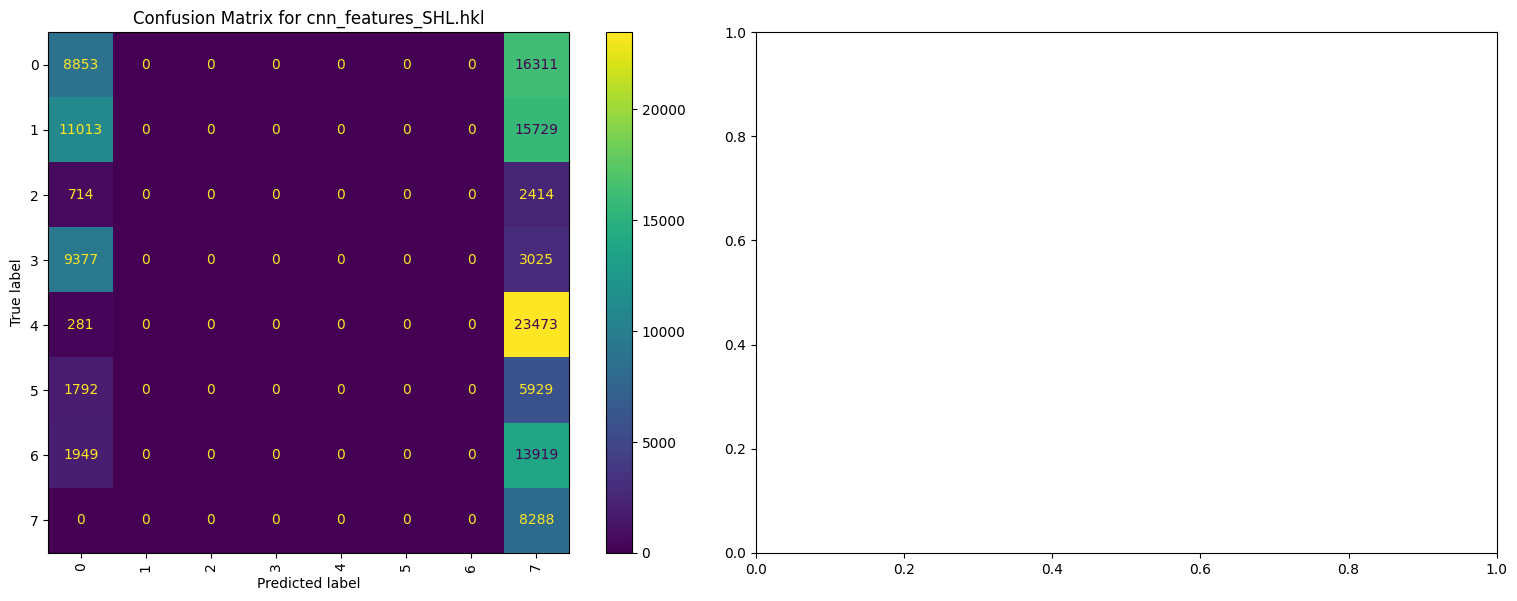

In [6]:
# to run the confusion matrix viewing
print(all_data.keys())
print_confusion(all_data)